<a href="https://colab.research.google.com/github/SidharthBhakth/Feedforward-NNs-in-TF-2.x/blob/master/1_Image_Classification_with_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [2]:
# Load in the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize data - scale data to range (0, 1)
X_train, X_test = X_train / 255.0 , X_test / 255.0

print("Train data shape: {}".format(X_train.shape))
print("Test data shape: {}".format(X_test.shape))

Train data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [0]:
# Build the model
model = Sequential([Flatten(input_shape=(28,28)),
                    Dense(128, activation='relu'),
                    Dropout(0.2),
                    Dense(10, activation='softmax')])

# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2933 - accuracy: 0.9145 - val_loss: 0.1405 - val_accuracy: 0.9587
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1419 - accuracy: 0.9573 - val_loss: 0.1031 - val_accuracy: 0.9694
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1074 - accuracy: 0.9674 - val_loss: 0.0956 - val_accuracy: 0.9716
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0869 - accuracy: 0.9731 - val_loss: 0.0859 - val_accuracy: 0.9736
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0736 - accuracy: 0.9770 - val_loss: 0.0764 - val_accuracy: 0.9759
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0665 - accuracy: 0.9788 - val_loss: 0.0745 - val_accuracy: 0.9776
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0596 - accuracy: 0.9810 - val_loss: 0.0795 - val_accuracy:

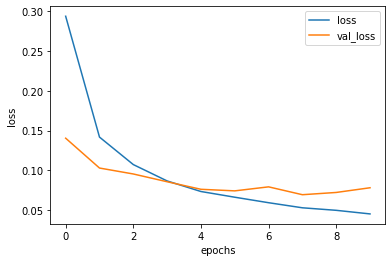

In [5]:
# Plot loss curve
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

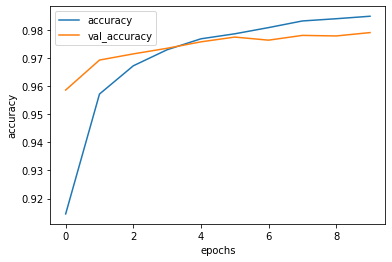

In [6]:
# Plot accuracy
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [7]:
# Evaluate the model
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0783 - accuracy: 0.9792


[0.07834796607494354, 0.979200005531311]

In [0]:
# Predict
y_pred = model.predict(X_test).argmax(axis=1)

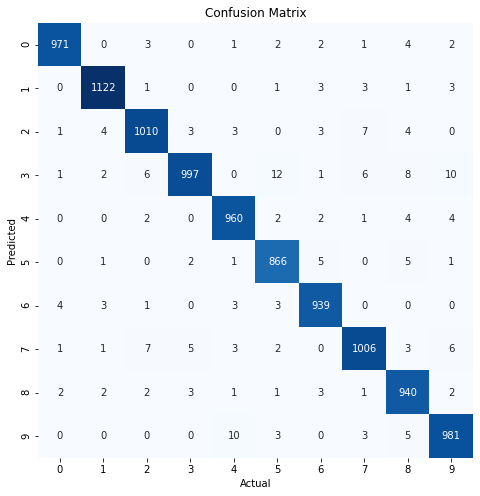

In [9]:
# Plot confusion matrix
cnf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
sns.heatmap(cnf_mat.T, square=True, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Actual: 8
Predicted: 3




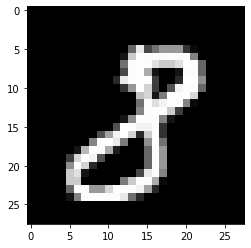

In [10]:
# View misclassifed examples
misclassified_idx = np.where(y_pred != y_test)[0]
idx = np.random.choice(misclassified_idx)

print("Actual: {}".format(y_test[idx]))
print("Predicted: {}".format(y_pred[idx]))
print("\n")

plt.imshow(X_test[idx], cmap='gray')
plt.show()